In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv("data.csv")
df.columns.to_list()

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length']

# Features
- person_age: Age of the individual applying for the loan.
- person_income: Annual income of the individual.
- person_home_ownership: Type of home ownership of the individual.
- rent: The individual is currently renting a property.
- mortgage: The individual has a mortgage on the property they own.
- own: The individual owns their home outright.
- other: Other categories of home ownership that may be specific to the dataset.
- person_emp_length: Employment length of the individual in years.
- loan_intent: The intent behind the loan application.
- loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    - A: The borrower has a high creditworthiness, indicating low risk.
    - B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    - C: The borrower's creditworthiness is moderate.
    - D: The borrower is considered to have higher risk compared to previous grades.
    - E: The borrower's creditworthiness is lower, indicating a higher risk.
    - F: The borrower poses a significant credit risk.
    - G: The borrower's creditworthiness is the lowest, signifying the highest risk.
- loan_amnt: The loan amount requested by the individual.
- loan_int_rate: The interest rate associated with the loan.
- loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    - 0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    - 1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
- loan_percent_income: The percentage of income represented by the loan amount.
- cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    - Y: The individual has a history of defaults on their credit file.
    - N: The individual does not have any history of defaults.
- cb_person_cred_hist_length: The length of credit history for the individual.

## Hypothesis
• Given a factors, is it possible to predict if an individual will default on their credit?
aka target = loan_status

Extension: what are the features that influence whether someone will default?


In [4]:
# Do EDA to understand the data
df.describe()
# have to clean person_age, person_emp_length, loan_pct_income = 0?

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##  Check for null values and duplicates

There are null values - we either handle them by deletion or imputation later.
As for duplicated rows they can be removed first.

In [5]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [6]:
print(df.duplicated().sum())
df = df.drop_duplicates()

165


loan_status
0    0.781312
1    0.218688
Name: proportion, dtype: float64


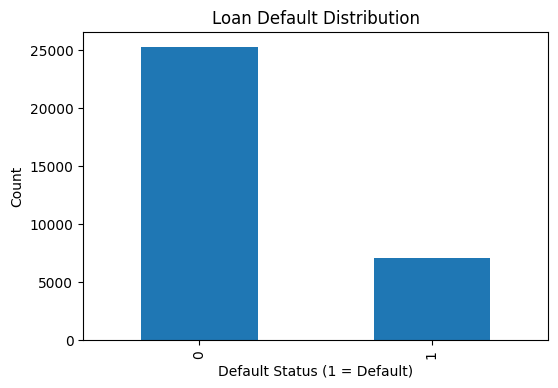

In [7]:
print(df["loan_status"].value_counts(normalize=True))
# 21% of the loans are defaulted
plt.figure(figsize=(6, 4))
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Default Distribution")
plt.xlabel("Default Status (1 = Default)")
plt.ylabel("Count")
plt.show()

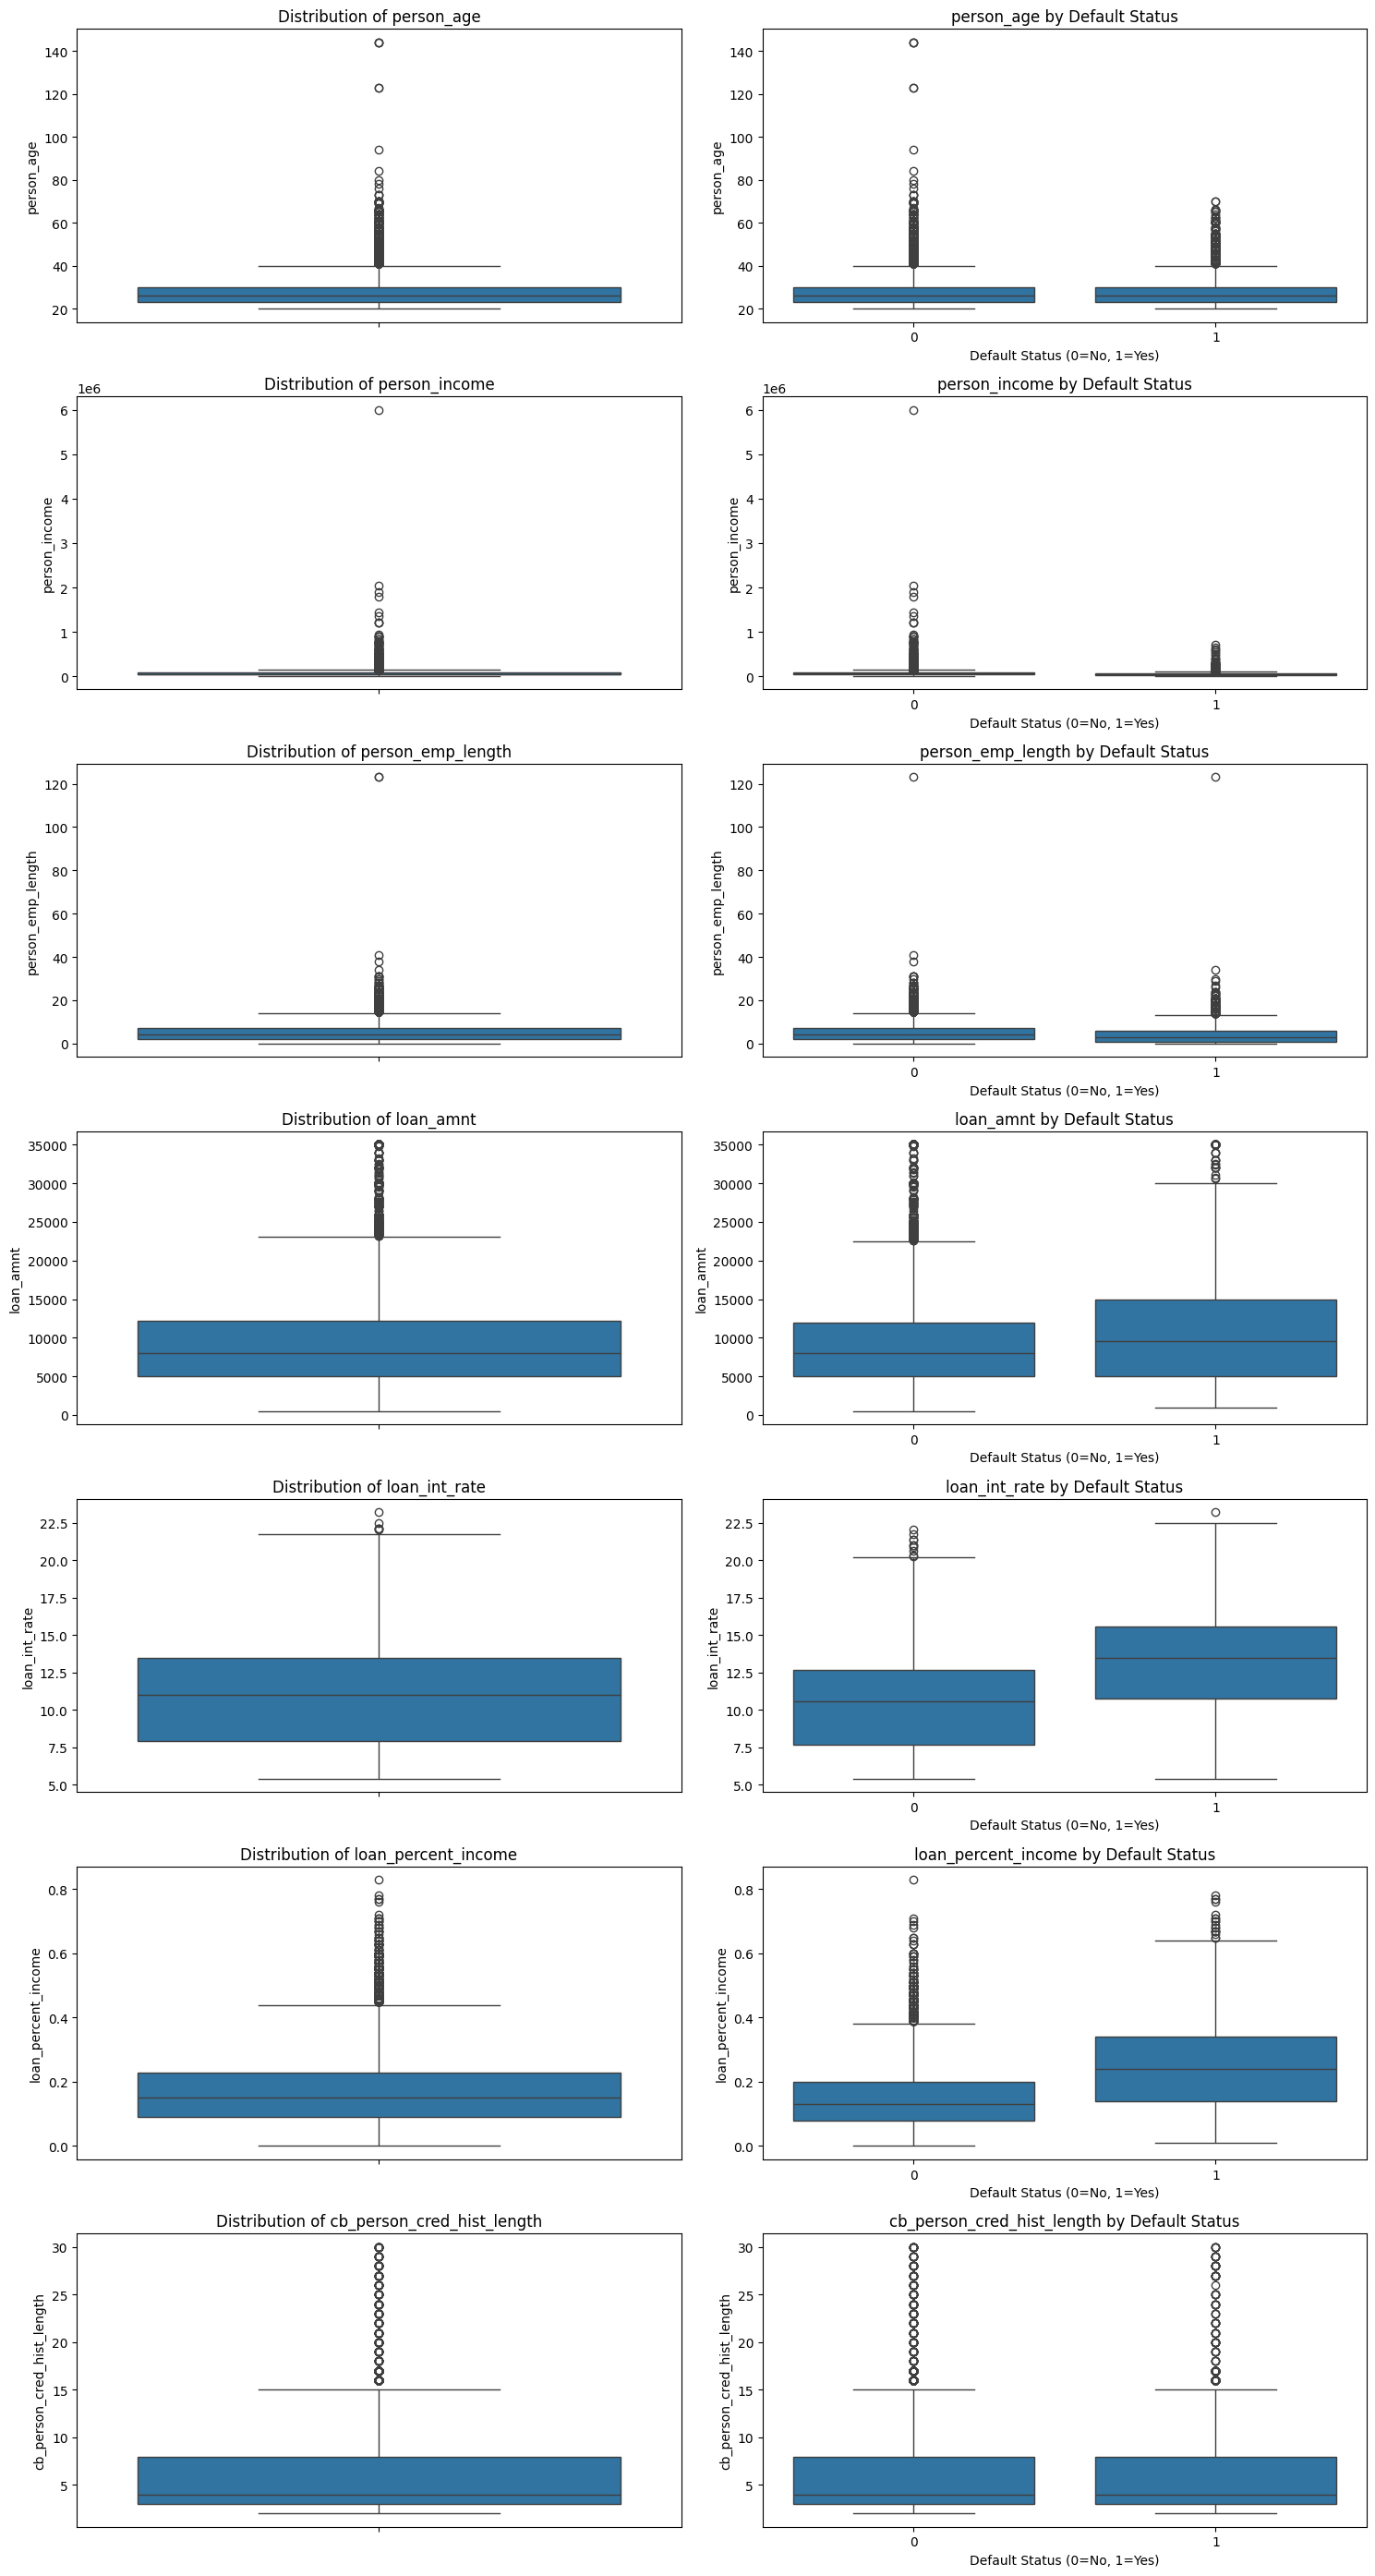

In [8]:
"""
'person_age', - Numerical
 'person_income', - Numerical
 'person_home_ownership', - Categorical
 'person_emp_length',   - Numerical
 'loan_intent', - Categorical
 'loan_grade', - Categorical
 'loan_amnt', - Numerical
 'loan_int_rate', - Numerical
 'loan_status', - Target
 'loan_percent_income',- Numerical
 'cb_person_default_on_file',- Categorical
 'cb_person_cred_hist_length'"- Numerical
"""

# Numerical features
num_features = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "cb_person_cred_hist_length",
]

fig, axes = plt.subplots(len(num_features), 2, figsize=(15, 4 * len(num_features)))
for i, feature in enumerate(num_features):
    # Box plot for overall distribution
    sns.boxplot(y=df[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f"Distribution of {feature}")
    axes[i, 0].set_ylabel(feature)

    # Boxplot by target
    sns.boxplot(x="loan_status", y=feature, data=df, ax=axes[i, 1])
    axes[i, 1].set_title(f"{feature} by Default Status")
    axes[i, 1].set_xlabel("Default Status (0=No, 1=Yes)")
    axes[i, 1].set_ylabel(feature)

plt.tight_layout()
plt.show()

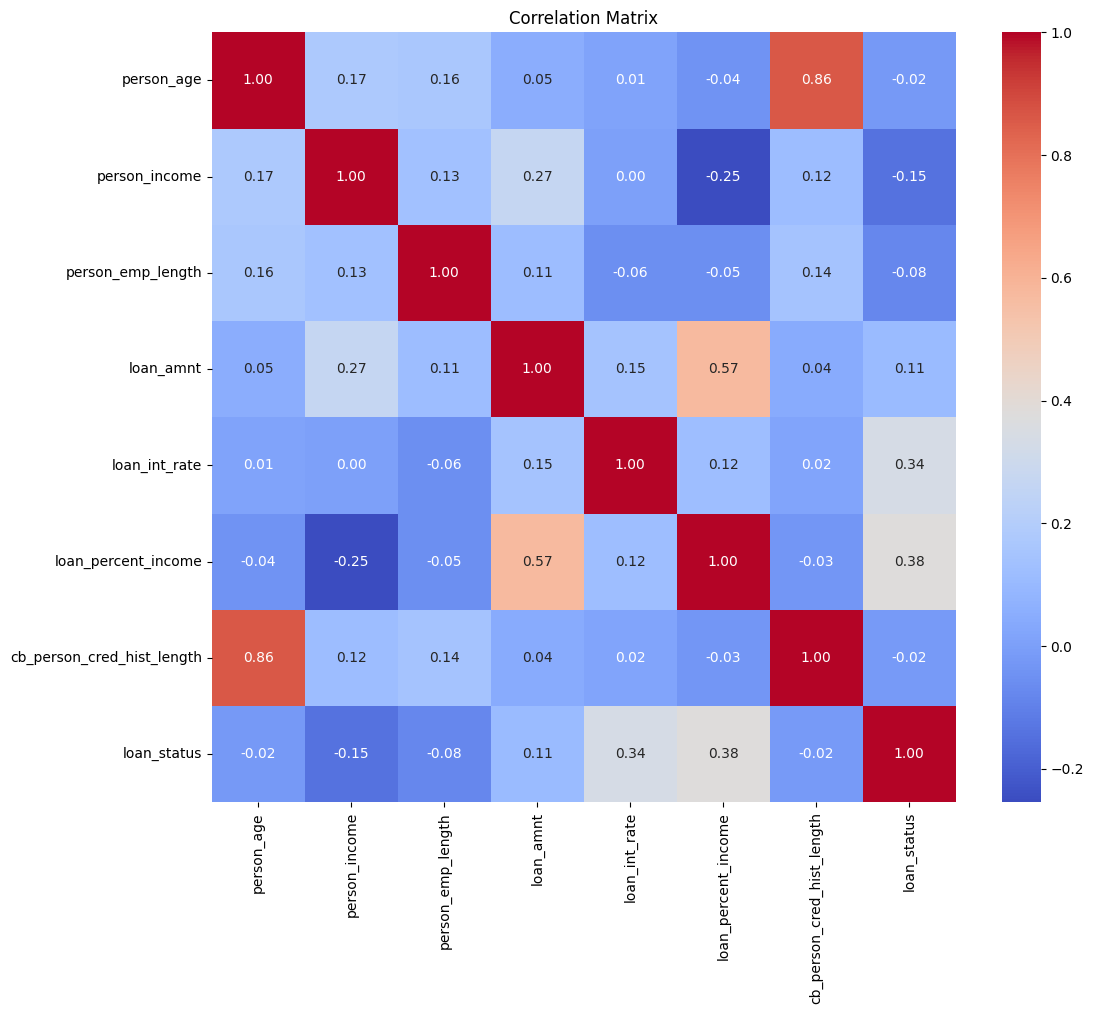

In [9]:
plt.figure(figsize=(12, 10))
corr = df[num_features + ["loan_status"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


INSIGHTS:
We thought person_age and person_employment_length would've had a higher correlation, since age and credit history length has a very strong correlation. We investigate this below.

The higher the income, the lower the loan expressed as % of income.
The higher the income, the higher the loan amount might be

The higher the loan amount, the higher they were as % of income, i.e. people with lower income take loans that result in higher leverage (to buy big ticket items)

Interest rates show almost no correlation to loan profile which is true in practice since they are driven by mkt forces

Of special interest to us, loan status (last row) has **highest correlation magnitude with  loan_perent_income and loan_int_rate and person_income.**

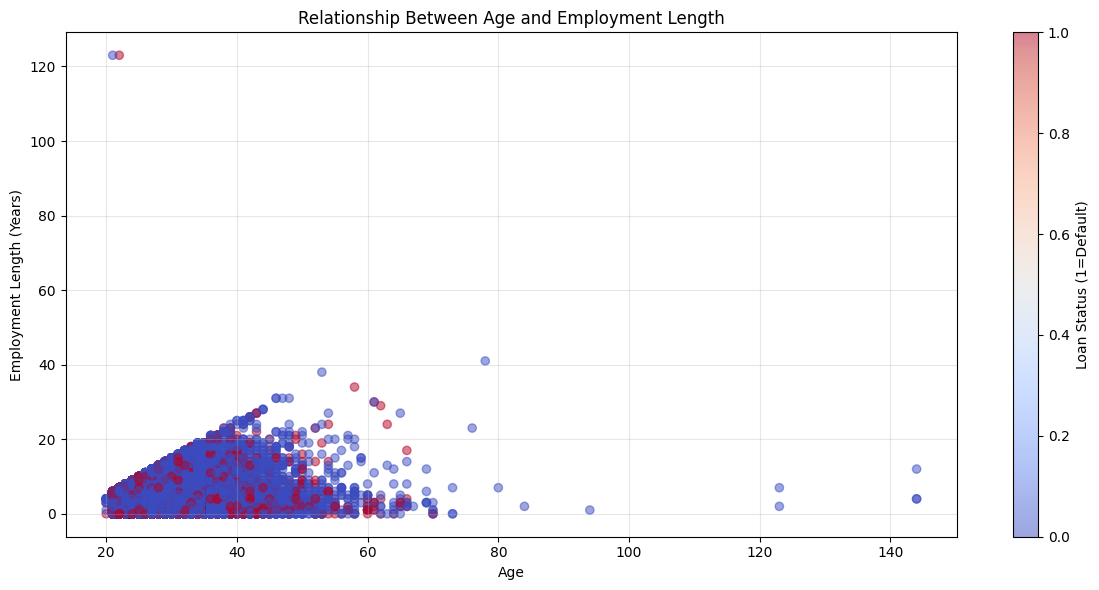

In [10]:
# Visualize relationship between age and employment length


# Scatter plot with color by loan status, turned into function since it will be called a few more times
def drawGraph(df):
    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(
        df["person_age"],
        df["person_emp_length"],
        c=df["loan_status"],
        alpha=0.5,
        cmap="coolwarm",
    )

    plt.colorbar(scatter, label="Loan Status (1=Default)")
    plt.xlabel("Age")
    plt.ylabel("Employment Length (Years)")
    plt.title("Relationship Between Age and Employment Length")

    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


drawGraph(df)

## Anomaly Cleaning:

It seemed weird that the correlation between employment length is so weak, so we visualized it. As expected, the correlation is affected by the presence of anomlous data at the top right.
Upon closer examination, having an employment length exceeding age is also anomalous, so we removed that as well. This allows our data to fall within a much more reasonable spread.

<Figure size 1200x600 with 0 Axes>

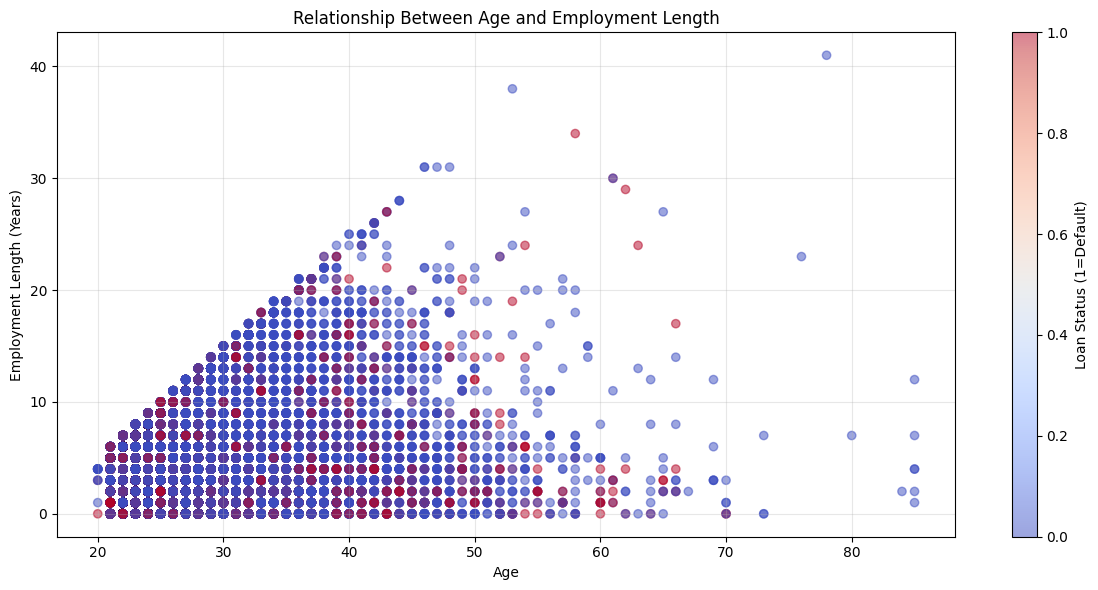

In [11]:
# Remove outliers
df["person_emp_length"] = df["person_emp_length"].clip(upper=45)
df["person_age"] = df["person_age"].clip(upper=85)
plt.figure(figsize=(12, 6))

# Remove outliers
df = df[df["person_emp_length"] < df["person_age"]]

drawGraph(df)

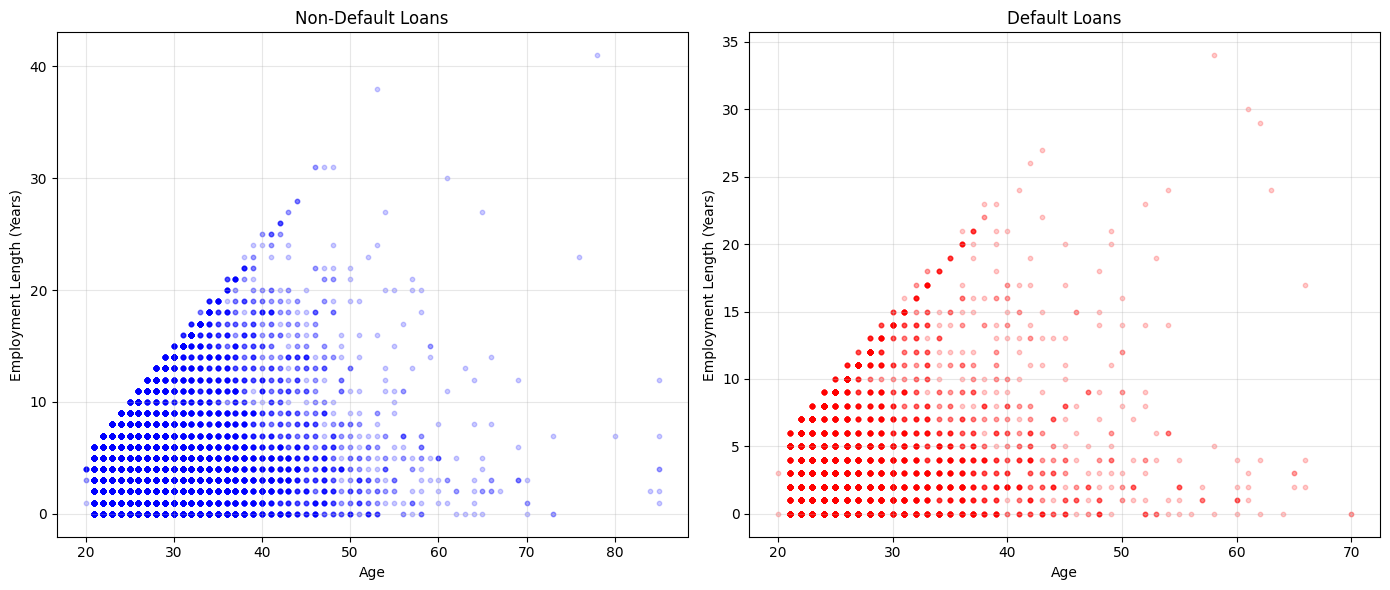

In [12]:
# Visualize the distribution of the two features in default VS non-default loans
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(
    df[df["loan_status"] == 0]["person_age"],
    df[df["loan_status"] == 0]["person_emp_length"],
    alpha=0.2,
    color="blue",
    s=10,
)
plt.xlabel("Age")
plt.ylabel("Employment Length (Years)")
plt.title("Non-Default Loans")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.scatter(
    df[df["loan_status"] == 1]["person_age"],
    df[df["loan_status"] == 1]["person_emp_length"],
    alpha=0.2,
    color="red",
    s=10,
)
plt.xlabel("Age")
plt.ylabel("Employment Length (Years)")
plt.title("Default Loans")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

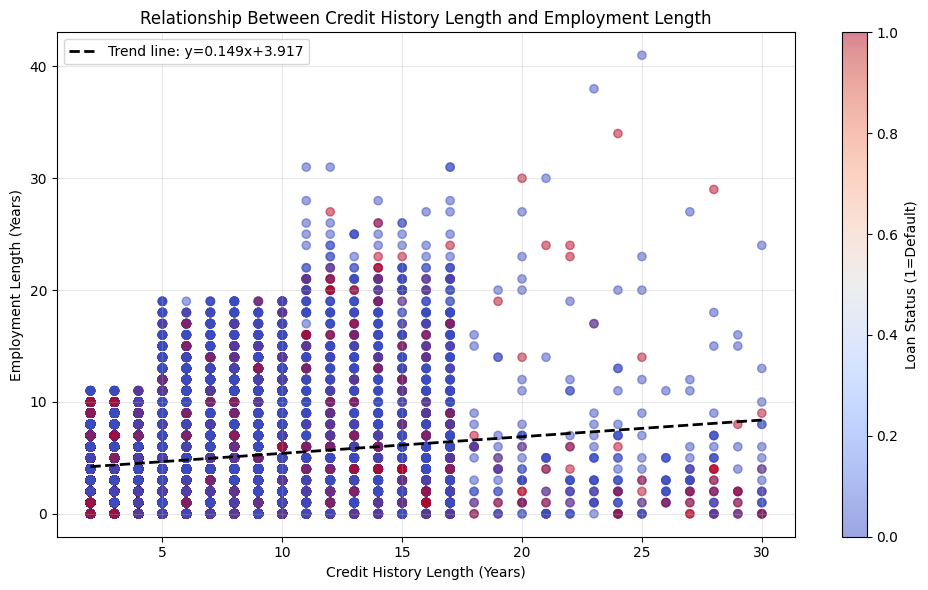

In [13]:
# Visualize the relationship between credit history length and employment length
plt.figure(figsize=(10, 6))

# Create scatter plot with color by loan status
scatter = plt.scatter(
    df["cb_person_cred_hist_length"],
    df["person_emp_length"],
    c=df["loan_status"],
    alpha=0.5,
    cmap="coolwarm",
)

# Add regression line
z = np.polyfit(df["cb_person_cred_hist_length"], df["person_emp_length"], 1)
p = np.poly1d(z)
plt.plot(
    df["cb_person_cred_hist_length"],
    p(df["cb_person_cred_hist_length"]),
    "k--",
    linewidth=2,
    label=f"Trend line: y={z[0]:.3f}x+{z[1]:.3f}",
)

plt.colorbar(scatter, label="Loan Status (1=Default)")
plt.xlabel("Credit History Length (Years)")
plt.ylabel("Employment Length (Years)")
plt.title("Relationship Between Credit History Length and Employment Length")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

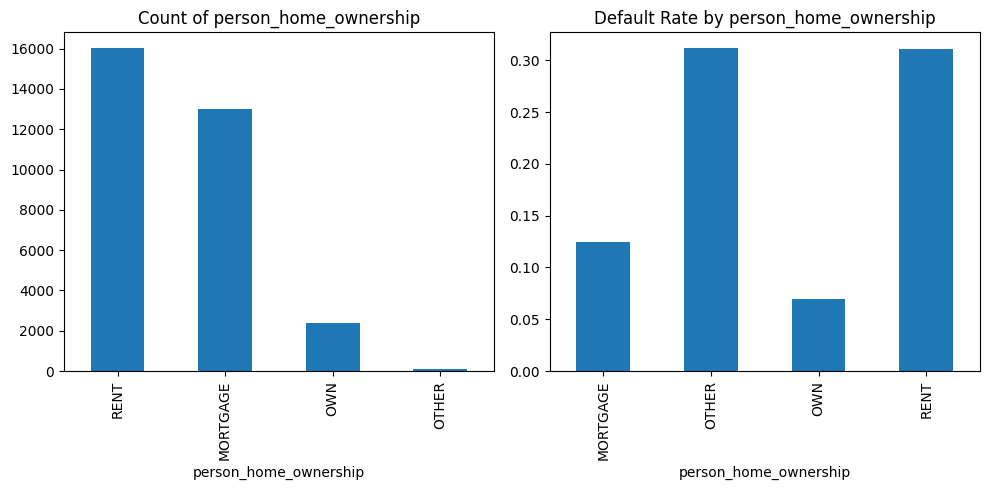

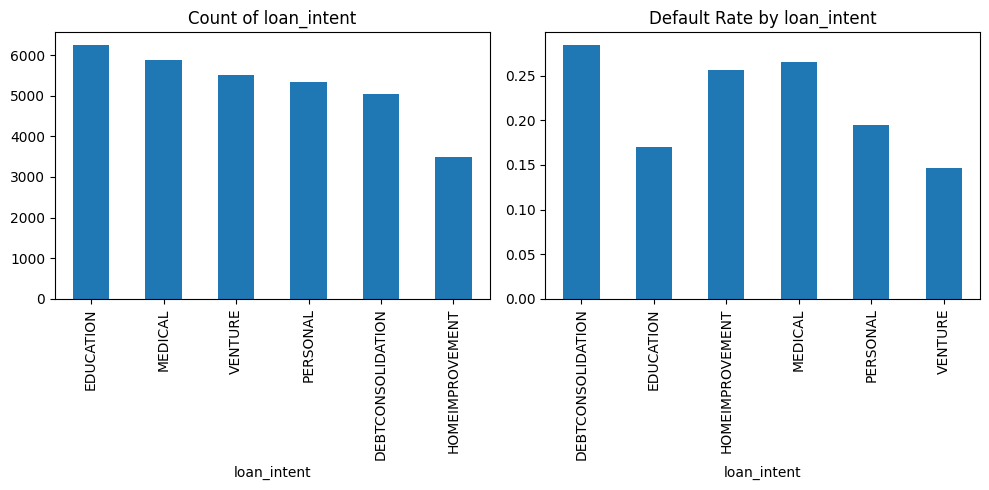

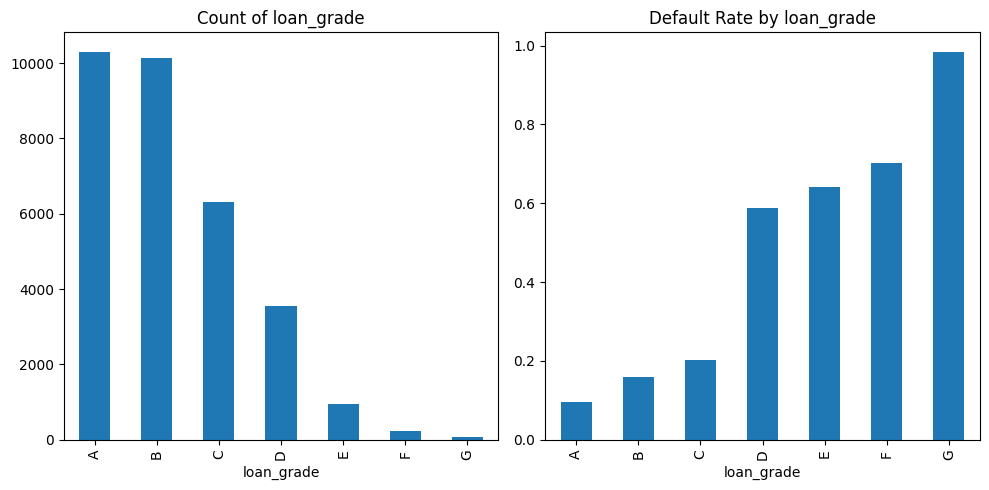

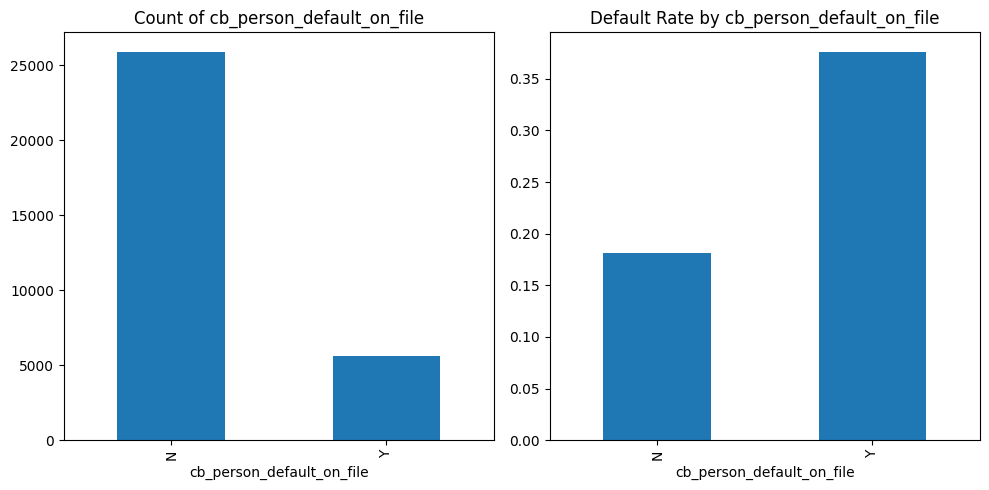

In [14]:
# categorical features visualization
cat_features = [
    "person_home_ownership",
    "loan_intent",
    "loan_grade",
    "cb_person_default_on_file",
]

for feature in cat_features:
    plt.figure(figsize=(10, 5))

    # Count by category
    plt.subplot(1, 2, 1)
    df[feature].value_counts().plot(kind="bar")
    plt.title(f"Count of {feature}")

    # Default rate by category
    plt.subplot(1, 2, 2)
    df.groupby(feature)["loan_status"].mean().plot(kind="bar")
    plt.title(f"Default Rate by {feature}")
    plt.tight_layout()
    plt.show()

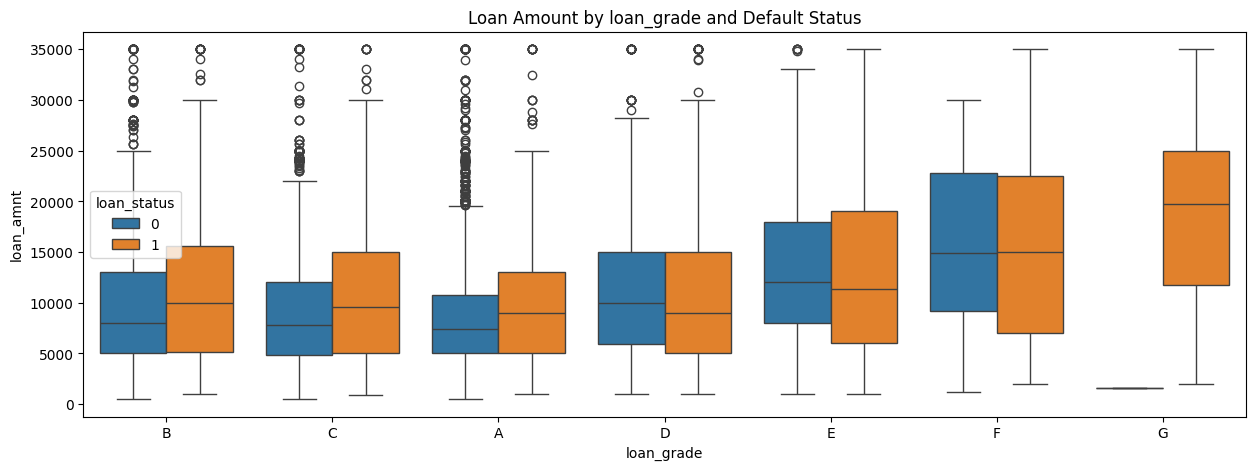

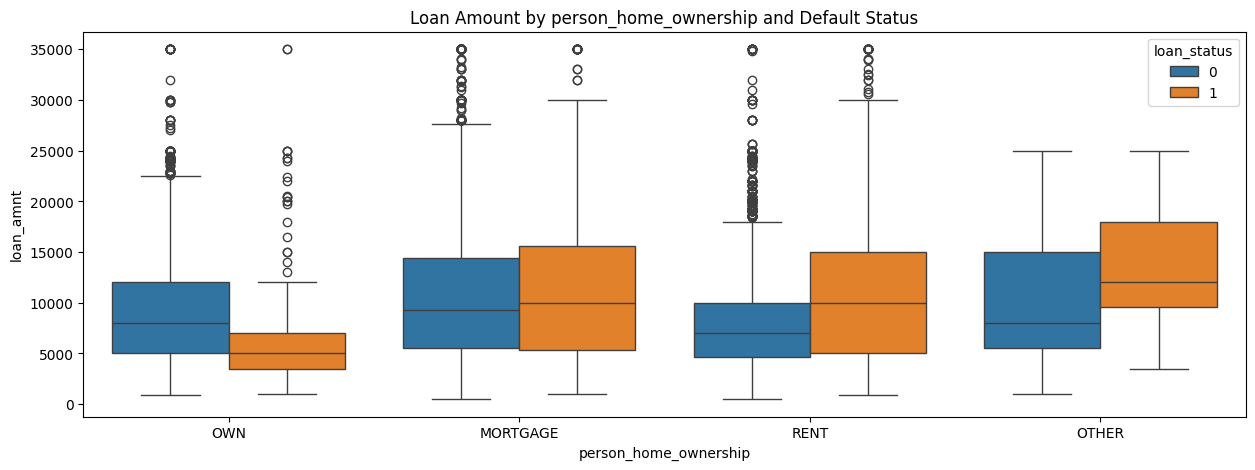

In [15]:
# For key categorical variables, analyze numerical features by category
for cat in ["loan_grade", "person_home_ownership"]:
    plt.figure(figsize=(15, 5))
    sns.boxplot(x=cat, y="loan_amnt", hue="loan_status", data=df)
    plt.title(f"Loan Amount by {cat} and Default Status")
    plt.show()

# Data Preprocessing

Principally, categorical labels need to be encoded into numerical ones.

We also investigate two strategies --> impute missing data VS delete missing data records

One thing that stood out was how home ownership type = OTHER had a high 30% default rate.
There are a few strategies:
1) Treat as RENT on the basis that their default rates are almost the same
2) Delete the record entirely
3) Do nothing

In [16]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# https://contrib.scikit-learn.org/category_encoders/
# other encoders we can try:
import category_encoders as ce

In [17]:
encoder = ce.OneHotEncoder(
    cols=cat_features,
    return_df=True,
    use_cat_names=True,
)

df = encoder.fit_transform(df)
df

,person_age,person_income,person_home_ownership_OWN,person_home_ownership_MORTGAGE,person_home_ownership_RENT,person_home_ownership_OTHER,person_emp_length,loan_intent_EDUCATION,loan_intent_MEDICAL,loan_intent_VENTURE,...,loan_grade_E,loan_grade_F,loan_grade_G,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file_N,cb_person_default_on_file_Y,cb_person_cred_hist_length
1,21,9600,1,0,0,0,5.0,1,0,0,...,0,0,0,1000,11.14,0,0.10,1,0,2
2,25,9600,0,1,0,0,1.0,0,1,0,...,0,0,0,5500,12.87,1,0.57,1,0,3
3,23,65500,0,0,1,0,4.0,0,1,0,...,0,0,0,35000,15.23,1,0.53,1,0,2
4,24,54400,0,0,1,0,8.0,0,1,0,...,0,0,0,35000,14.27,1,0.55,0,1,4
5,21,9900,1,0,0,0,2.0,0,0,1,...,0,0,0,2500,7.14,1,0.25,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1,0,0,1.0,0,0,0,...,0,0,0,5800,13.16,0,0.11,1,0,30
32577,54,120000,0,1,0,0,4.0,0,0,0,...,0,0,0,17625,7.49,0,0.15,1,0,19
32578,65,76000,0,0,1,0,3.0,0,0,0,...,0,0,0,35000,10.99,1,0.46,1,0,28
32579,56,150000,0,1,0,0,5.0,0,0,0,...,0,0,0,15000,11.48,0,0.10,1,0,26


In [18]:
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [19]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1015
)

In [20]:
# Standardize numerical features with StandardScaler
# Scale numerical features
scaler = StandardScaler()
numerical_cols = [
    col
    for col in X_train.columns
    if X_train[col].dtype in ["int64", "float64"]
    and "person_home_ownership_" != col  # these are all categorical
    and "loan_intent_" != col
    and "loan_grade_" != col
    and "cb_person_default_on_file_" != col
]

In [21]:
[col for col in X_train.columns]

['person_age',
 'person_income',
 'person_home_ownership_OWN',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_RENT',
 'person_home_ownership_OTHER',
 'person_emp_length',
 'loan_intent_EDUCATION',
 'loan_intent_MEDICAL',
 'loan_intent_VENTURE',
 'loan_intent_PERSONAL',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_A',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file_N',
 'cb_person_default_on_file_Y',
 'cb_person_cred_hist_length']

# Approach 1: Data Imputation
Based on checking the null values from above, the data that needs to be imputed are all numerical (person_emp_length and interest_rate).

In [22]:
# Get the names of columns with missing values
columns_with_nulls = X_train.columns[X_train.isnull().any()].tolist()

# Impute missing values for numerical features
numerical_imputer = SimpleImputer(strategy="mean")

# Create a copy to avoid modifying the original
X_train_imputed = X_train.copy()
X_test_imputed = X_test.copy()


# Impute missing values
X_train_imputed[columns_with_nulls] = numerical_imputer.fit_transform(
    X_train[columns_with_nulls]
)
X_test_imputed[columns_with_nulls] = numerical_imputer.transform(
    X_test[columns_with_nulls]
)


X_train_imputed[numerical_cols] = scaler.fit_transform(X_train_imputed[numerical_cols])
X_test_imputed[numerical_cols] = scaler.transform(X_test_imputed[numerical_cols])

print(f"Training data shape: {X_train_imputed.shape}")
print(f"Testing data shape: {X_test_imputed.shape}")
print(f"Number of features: {X_train_imputed.shape[1]}")

Training data shape: (25221, 26)
Testing data shape: (6306, 26)
Number of features: 26


## Approach 2:
We simply drop the rows where there are null values present

In [23]:
# Create clean datasets by dropping rows with null values
X_train_dropped = X_train.dropna().copy()
y_train_dropped = y_train[
    X_train_dropped.index
]  # Ensure y_train_dropped matches the indices of X_train_dropped

X_test_dropped = X_test.dropna().copy()
y_test_dropped = y_test[X_test_dropped.index]

X_train_dropped[numerical_cols] = scaler.fit_transform(X_train_dropped[numerical_cols])
X_test_dropped[numerical_cols] = scaler.transform(X_test_dropped[numerical_cols])

print(f"Original training data shape: {X_train.shape}")
print(f"Cleaned training data shape: {X_train_dropped.shape}")
print(f"Rows removed: {X_train.shape[0] - X_train_dropped.shape[0]}")
print(f"Original test data shape: {X_test.shape}")
print(f"Cleaned test data shape: {X_test_dropped.shape}")
print(f"Rows removed: {X_test.shape[0] - X_test_dropped.shape[0]}")

Original training data shape: (25221, 26)
Cleaned training data shape: (22786, 26)
Rows removed: 2435
Original test data shape: (6306, 26)
Cleaned test data shape: (5713, 26)
Rows removed: 593


In [24]:
from pycaret.classification import *

In [25]:
model = setup(data=df, target="loan_status")


,Description,Value
0,Session id,1807
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(31527, 27)"
4,Transformed data shape,"(31527, 27)"
5,Transformed train set shape,"(22068, 27)"
6,Transformed test set shape,"(9459, 27)"
7,Numeric features,26
8,Rows with missing values,9.6%
9,Preprocess,True


In [26]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9357,0.9448,0.7196,0.9768,0.8283,0.7900,0.8042,0.9990
rf,Random Forest Classifier,0.9328,0.9298,0.7142,0.9655,0.8207,0.7805,0.7941,0.3320
gbc,Gradient Boosting Classifier,0.9269,0.9255,0.7012,0.9463,0.8052,0.7615,0.7746,0.2950
et,Extra Trees Classifier,0.9189,0.9114,0.6779,0.9271,0.7829,0.7345,0.7483,0.3040
dt,Decision Tree Classifier,0.8858,0.8405,0.7608,0.7247,0.7421,0.6688,0.6693,0.0420
ada,Ada Boost Classifier,0.8844,0.8954,0.6351,0.7885,0.7033,0.6326,0.6384,0.0910
lda,Linear Discriminant Analysis,0.8627,0.8638,0.5734,0.7328,0.6433,0.5599,0.5664,0.0290
ridge,Ridge Classifier,0.8583,0.8638,0.4993,0.7624,0.6032,0.5215,0.5389,0.0210
lr,Logistic Regression,0.8503,0.8509,0.4550,0.7544,0.5675,0.4837,0.5064,0.4740
qda,Quadratic Discriminant Analysis,0.8486,0.8607,0.5313,0.6939,0.5885,0.5021,0.5129,0.0270


In [27]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [28]:
from sklearn.decomposition import PCA
df_clean = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Convert to DataFrame
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Show explained variance
print(pca.explained_variance_ratio_)

[0.13189015 0.08532479]


In [29]:
print(pca_df)

            PC1       PC2
0     -0.957649 -1.422111
1      1.319816 -0.938348
2      2.541650 -1.666788
3      4.579877 -0.318518
4     -1.133700 -1.684144
...         ...       ...
28494 -0.046963  4.687060
28495 -2.069407  4.003371
28496  0.890393  2.893965
28497 -1.179491  4.668791
28498 -0.598338  2.518069

[28499 rows x 2 columns]


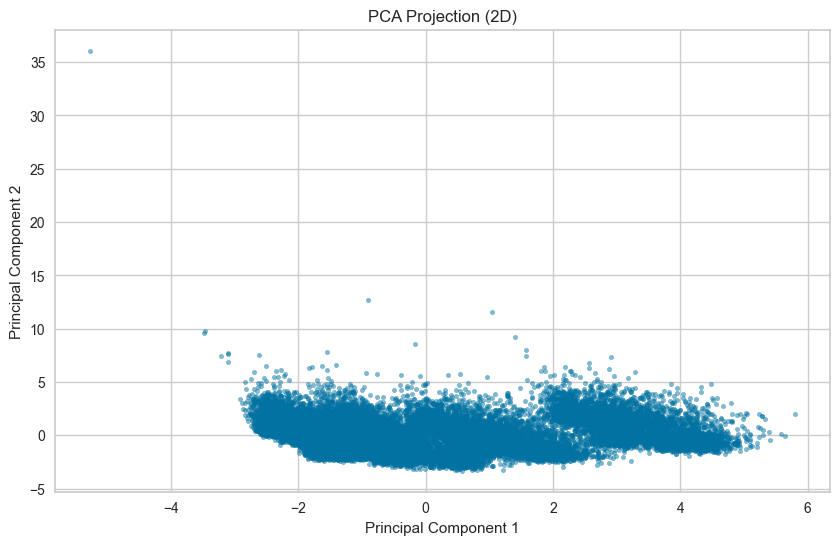

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, s=10)
plt.title('PCA Projection (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [31]:
df_clean = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3'])

# Show explained variance
print(pca.explained_variance_ratio_)

[0.13188888 0.08530794 0.07152079]


Low explained variance for each Principal Components suggests that most of the important variation is spread out across more components (data is likely high-dimensional and complex), meaning we have to keep more features for a good model
Also means that linear models will likely struggle

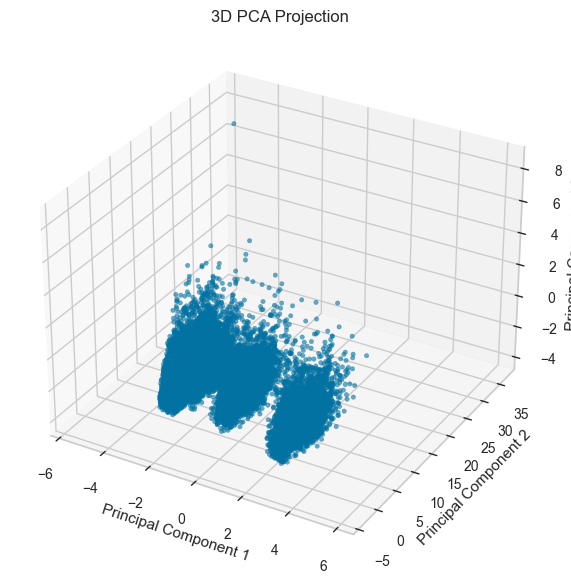

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], alpha=0.6, s=10)

ax.set_title('3D PCA Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

Visually it appears that there are 3 distinct clusters

Since data is highly complex, try Neural Network which can effectively capture non linear relationships

In [43]:
import torch
import torch.nn as nn
import torch.optim as optim

df_cleaned = df.dropna()
X = df_cleaned.drop("loan_status", axis=1).to_numpy(dtype=np.float32)
y = df_cleaned["loan_status"].to_numpy(dtype=np.float32).reshape(-1, 1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1015
)


In [44]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [45]:
assert not torch.isnan(X_train_tensor).any(), "NaNs in training data"
assert not torch.isnan(y_train_tensor).any(), "NaNs in training labels"


In [52]:
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")
    

Epoch [10/1000], Loss: 0.7259
Epoch [20/1000], Loss: 0.6923
Epoch [30/1000], Loss: 0.6559
Epoch [40/1000], Loss: 0.6110
Epoch [50/1000], Loss: 0.5584
Epoch [60/1000], Loss: 0.5052
Epoch [70/1000], Loss: 0.4606
Epoch [80/1000], Loss: 0.4286
Epoch [90/1000], Loss: 0.4074
Epoch [100/1000], Loss: 0.3927
Epoch [110/1000], Loss: 0.3811
Epoch [120/1000], Loss: 0.3711
Epoch [130/1000], Loss: 0.3620
Epoch [140/1000], Loss: 0.3537
Epoch [150/1000], Loss: 0.3461
Epoch [160/1000], Loss: 0.3390
Epoch [170/1000], Loss: 0.3326
Epoch [180/1000], Loss: 0.3268
Epoch [190/1000], Loss: 0.3215
Epoch [200/1000], Loss: 0.3167
Epoch [210/1000], Loss: 0.3124
Epoch [220/1000], Loss: 0.3085
Epoch [230/1000], Loss: 0.3049
Epoch [240/1000], Loss: 0.3015
Epoch [250/1000], Loss: 0.2983
Epoch [260/1000], Loss: 0.2952
Epoch [270/1000], Loss: 0.2923
Epoch [280/1000], Loss: 0.2896
Epoch [290/1000], Loss: 0.2871
Epoch [300/1000], Loss: 0.2848
Epoch [310/1000], Loss: 0.2827
Epoch [320/1000], Loss: 0.2807
Epoch [330/1000],

In [56]:
first_layer_neurons = 64
# Increase the number of neurons in each layer by
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, 16)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, 1)
        self.sigmoid = nn.Sigmoid()
        # self.dropout = nn.Dropout(p=0.3)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.5878
Epoch [20/1000], Loss: 0.4829
Epoch [30/1000], Loss: 0.4035
Epoch [40/1000], Loss: 0.3640
Epoch [50/1000], Loss: 0.3422
Epoch [60/1000], Loss: 0.3271
Epoch [70/1000], Loss: 0.3146
Epoch [80/1000], Loss: 0.3052
Epoch [90/1000], Loss: 0.2973
Epoch [100/1000], Loss: 0.2905
Epoch [110/1000], Loss: 0.2846
Epoch [120/1000], Loss: 0.2792
Epoch [130/1000], Loss: 0.2742
Epoch [140/1000], Loss: 0.2695
Epoch [150/1000], Loss: 0.2652
Epoch [160/1000], Loss: 0.2612
Epoch [170/1000], Loss: 0.2575
Epoch [180/1000], Loss: 0.2542
Epoch [190/1000], Loss: 0.2511
Epoch [200/1000], Loss: 0.2482
Epoch [210/1000], Loss: 0.2455
Epoch [220/1000], Loss: 0.2430
Epoch [230/1000], Loss: 0.2407
Epoch [240/1000], Loss: 0.2386
Epoch [250/1000], Loss: 0.2365
Epoch [260/1000], Loss: 0.2346
Epoch [270/1000], Loss: 0.2327
Epoch [280/1000], Loss: 0.2309
Epoch [290/1000], Loss: 0.2292
Epoch [300/1000], Loss: 0.2275
Epoch [310/1000], Loss: 0.2258
Epoch [320/1000], Loss: 0.2242
Epoch [330/1000],

Large difference between train and test accuracy implies overfitting

Add dropout to reduce overfitting

In [58]:
first_layer_neurons = 128
# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, 1)
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.sigmoid(self.fc3(x))
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.5828
Epoch [20/1000], Loss: 0.4971
Epoch [30/1000], Loss: 0.4288
Epoch [40/1000], Loss: 0.3894
Epoch [50/1000], Loss: 0.3656
Epoch [60/1000], Loss: 0.3487
Epoch [70/1000], Loss: 0.3369
Epoch [80/1000], Loss: 0.3288
Epoch [90/1000], Loss: 0.3196
Epoch [100/1000], Loss: 0.3135
Epoch [110/1000], Loss: 0.3045
Epoch [120/1000], Loss: 0.2994
Epoch [130/1000], Loss: 0.2952
Epoch [140/1000], Loss: 0.2911
Epoch [150/1000], Loss: 0.2861
Epoch [160/1000], Loss: 0.2840
Epoch [170/1000], Loss: 0.2801
Epoch [180/1000], Loss: 0.2785
Epoch [190/1000], Loss: 0.2741
Epoch [200/1000], Loss: 0.2722
Epoch [210/1000], Loss: 0.2703
Epoch [220/1000], Loss: 0.2675
Epoch [230/1000], Loss: 0.2672
Epoch [240/1000], Loss: 0.2638
Epoch [250/1000], Loss: 0.2633
Epoch [260/1000], Loss: 0.2595
Epoch [270/1000], Loss: 0.2595
Epoch [280/1000], Loss: 0.2562
Epoch [290/1000], Loss: 0.2569
Epoch [300/1000], Loss: 0.2552
Epoch [310/1000], Loss: 0.2536
Epoch [320/1000], Loss: 0.2503
Epoch [330/1000],

As expected, test accuracy increased

We can try to improve the overall accuracy by adding more layers

Epoch [10/1000], Loss: 0.4112
Epoch [20/1000], Loss: 0.3655
Epoch [30/1000], Loss: 0.3269
Epoch [40/1000], Loss: 0.2913
Epoch [50/1000], Loss: 0.2733
Epoch [60/1000], Loss: 0.2584
Epoch [70/1000], Loss: 0.2502
Epoch [80/1000], Loss: 0.2423
Epoch [90/1000], Loss: 0.2357
Epoch [100/1000], Loss: 0.2285
Epoch [110/1000], Loss: 0.2248
Epoch [120/1000], Loss: 0.2211
Epoch [130/1000], Loss: 0.2180
Epoch [140/1000], Loss: 0.2149
Epoch [150/1000], Loss: 0.2109
Epoch [160/1000], Loss: 0.2111
Epoch [170/1000], Loss: 0.2067
Epoch [180/1000], Loss: 0.2035
Epoch [190/1000], Loss: 0.2021
Epoch [200/1000], Loss: 0.2006
Epoch [210/1000], Loss: 0.1973
Epoch [220/1000], Loss: 0.1924
Epoch [230/1000], Loss: 0.1912
Epoch [240/1000], Loss: 0.1917
Epoch [250/1000], Loss: 0.1900
Epoch [260/1000], Loss: 0.1842
Epoch [270/1000], Loss: 0.1840
Epoch [280/1000], Loss: 0.1815
Epoch [290/1000], Loss: 0.1790
Epoch [300/1000], Loss: 0.1787
Epoch [310/1000], Loss: 0.1758
Epoch [320/1000], Loss: 0.1725
Epoch [330/1000],

Try lesser epochs to reduce overfitting

In [62]:
first_layer_neurons = 1024
# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, first_layer_neurons//4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons//4, first_layer_neurons//8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons//8, 1)
        self.relu5 = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        x = self.sigmoid(x)
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/200], Loss: 0.4076
Epoch [20/200], Loss: 0.3692
Epoch [30/200], Loss: 0.3265
Epoch [40/200], Loss: 0.2883
Epoch [50/200], Loss: 0.2703
Epoch [60/200], Loss: 0.2571
Epoch [70/200], Loss: 0.2484
Epoch [80/200], Loss: 0.2393
Epoch [90/200], Loss: 0.2323
Epoch [100/200], Loss: 0.2285
Epoch [110/200], Loss: 0.2236
Epoch [120/200], Loss: 0.2189
Epoch [130/200], Loss: 0.2167
Epoch [140/200], Loss: 0.2117
Epoch [150/200], Loss: 0.2103
Epoch [160/200], Loss: 0.2071
Epoch [170/200], Loss: 0.2048
Epoch [180/200], Loss: 0.2040
Epoch [190/200], Loss: 0.1997
Epoch [200/200], Loss: 0.1938

Train Accuracy: 0.9388

Test Accuracy: 0.9211


Change from sigmoid to BCEWithLogitsLoss which is more stable by avoiding issues with vanishing gradients

In [64]:
first_layer_neurons = 1024
# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, first_layer_neurons//4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons//4, first_layer_neurons//8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons//8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/200], Loss: 0.4205
Epoch [20/200], Loss: 0.3679
Epoch [30/200], Loss: 0.3285
Epoch [40/200], Loss: 0.2938
Epoch [50/200], Loss: 0.2724
Epoch [60/200], Loss: 0.2600
Epoch [70/200], Loss: 0.2515
Epoch [80/200], Loss: 0.2437
Epoch [90/200], Loss: 0.2368
Epoch [100/200], Loss: 0.2305
Epoch [110/200], Loss: 0.2276
Epoch [120/200], Loss: 0.2208
Epoch [130/200], Loss: 0.2172
Epoch [140/200], Loss: 0.2151
Epoch [150/200], Loss: 0.2120
Epoch [160/200], Loss: 0.2121
Epoch [170/200], Loss: 0.2070
Epoch [180/200], Loss: 0.2046
Epoch [190/200], Loss: 0.2031
Epoch [200/200], Loss: 0.1985

Train Accuracy: 0.9374

Test Accuracy: 0.9233


Increase epoch to reduce bias and add weight decay (L2 regularization) to reduce variance/overfitting

In [65]:
first_layer_neurons = 1024
# Increase the number of neurons in each layer by a factor of 4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, first_layer_neurons//4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons//4, first_layer_neurons//8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons//8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.3)
        self.dropout4 = nn.Dropout(0.3)
        self.dropout5 = nn.Dropout(0.3)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.4188
Epoch [20/500], Loss: 0.3700
Epoch [30/500], Loss: 0.3314
Epoch [40/500], Loss: 0.2942
Epoch [50/500], Loss: 0.2761
Epoch [60/500], Loss: 0.2586
Epoch [70/500], Loss: 0.2497
Epoch [80/500], Loss: 0.2428
Epoch [90/500], Loss: 0.2365
Epoch [100/500], Loss: 0.2304
Epoch [110/500], Loss: 0.2259
Epoch [120/500], Loss: 0.2233
Epoch [130/500], Loss: 0.2173
Epoch [140/500], Loss: 0.2173
Epoch [150/500], Loss: 0.2116
Epoch [160/500], Loss: 0.2099
Epoch [170/500], Loss: 0.2072
Epoch [180/500], Loss: 0.2047
Epoch [190/500], Loss: 0.2012
Epoch [200/500], Loss: 0.1992
Epoch [210/500], Loss: 0.1979
Epoch [220/500], Loss: 0.1937
Epoch [230/500], Loss: 0.1907
Epoch [240/500], Loss: 0.1892
Epoch [250/500], Loss: 0.1876
Epoch [260/500], Loss: 0.1862
Epoch [270/500], Loss: 0.1830
Epoch [280/500], Loss: 0.1810
Epoch [290/500], Loss: 0.1784
Epoch [300/500], Loss: 0.1763
Epoch [310/500], Loss: 0.1702
Epoch [320/500], Loss: 0.1748
Epoch [330/500], Loss: 0.1694
Epoch [340/500], Lo

Try increase dropout to prevent overfitting

Increase weight decay by factor of 10 to reduce overfitting and increase dropout to 0.5

In [68]:
first_layer_neurons = 1024
dropout_rate = 0.4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, first_layer_neurons//4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons//4, first_layer_neurons//8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons//8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.dropout5 = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.4242
Epoch [20/500], Loss: 0.3725
Epoch [30/500], Loss: 0.3378
Epoch [40/500], Loss: 0.3030
Epoch [50/500], Loss: 0.2785
Epoch [60/500], Loss: 0.2650
Epoch [70/500], Loss: 0.2573
Epoch [80/500], Loss: 0.2506
Epoch [90/500], Loss: 0.2460
Epoch [100/500], Loss: 0.2390
Epoch [110/500], Loss: 0.2345
Epoch [120/500], Loss: 0.2312
Epoch [130/500], Loss: 0.2299
Epoch [140/500], Loss: 0.2260
Epoch [150/500], Loss: 0.2234
Epoch [160/500], Loss: 0.2221
Epoch [170/500], Loss: 0.2194
Epoch [180/500], Loss: 0.2152
Epoch [190/500], Loss: 0.2137
Epoch [200/500], Loss: 0.2130
Epoch [210/500], Loss: 0.2115
Epoch [220/500], Loss: 0.2097
Epoch [230/500], Loss: 0.2081
Epoch [240/500], Loss: 0.2057
Epoch [250/500], Loss: 0.2051
Epoch [260/500], Loss: 0.2065
Epoch [270/500], Loss: 0.2024
Epoch [280/500], Loss: 0.2046
Epoch [290/500], Loss: 0.2043
Epoch [300/500], Loss: 0.2009
Epoch [310/500], Loss: 0.2001
Epoch [320/500], Loss: 0.2000
Epoch [330/500], Loss: 0.2004
Epoch [340/500], Lo

Try with lesser neurons 

In [69]:
first_layer_neurons = 512
dropout_rate = 0.4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.fc1 = nn.Linear(input_size, first_layer_neurons)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_layer_neurons, first_layer_neurons//2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(first_layer_neurons//2, first_layer_neurons//4)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(first_layer_neurons//4, first_layer_neurons//8)
        self.relu4 = nn.ReLU()
        self.fc5 = nn.Linear(first_layer_neurons//8, 1)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.dropout3 = nn.Dropout(dropout_rate)
        self.dropout4 = nn.Dropout(dropout_rate)
        self.dropout5 = nn.Dropout(dropout_rate)
    
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.dropout1(x)
        x = self.relu2(self.fc2(x))
        x = self.dropout2(x)
        x = self.relu3(self.fc3(x))
        x = self.dropout3(x)
        x = self.relu4(self.fc4(x))
        x = self.dropout4(x)
        x = self.fc5(x)
        return x

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.5221
Epoch [20/500], Loss: 0.4064
Epoch [30/500], Loss: 0.3769
Epoch [40/500], Loss: 0.3598
Epoch [50/500], Loss: 0.3312
Epoch [60/500], Loss: 0.3060
Epoch [70/500], Loss: 0.2884
Epoch [80/500], Loss: 0.2758
Epoch [90/500], Loss: 0.2690
Epoch [100/500], Loss: 0.2622
Epoch [110/500], Loss: 0.2561
Epoch [120/500], Loss: 0.2546
Epoch [130/500], Loss: 0.2464
Epoch [140/500], Loss: 0.2444
Epoch [150/500], Loss: 0.2406
Epoch [160/500], Loss: 0.2365
Epoch [170/500], Loss: 0.2346
Epoch [180/500], Loss: 0.2318
Epoch [190/500], Loss: 0.2303
Epoch [200/500], Loss: 0.2270
Epoch [210/500], Loss: 0.2268
Epoch [220/500], Loss: 0.2227
Epoch [230/500], Loss: 0.2233
Epoch [240/500], Loss: 0.2212
Epoch [250/500], Loss: 0.2214
Epoch [260/500], Loss: 0.2199
Epoch [270/500], Loss: 0.2167
Epoch [280/500], Loss: 0.2167
Epoch [290/500], Loss: 0.2162
Epoch [300/500], Loss: 0.2148
Epoch [310/500], Loss: 0.2131
Epoch [320/500], Loss: 0.2111
Epoch [330/500], Loss: 0.2130
Epoch [340/500], Lo

In [77]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/500], Loss: 0.5751
Epoch [20/500], Loss: 0.5009
Epoch [30/500], Loss: 0.4538
Epoch [40/500], Loss: 0.4185
Epoch [50/500], Loss: 0.3956
Epoch [60/500], Loss: 0.3742
Epoch [70/500], Loss: 0.3584
Epoch [80/500], Loss: 0.3417
Epoch [90/500], Loss: 0.3289
Epoch [100/500], Loss: 0.3189
Epoch [110/500], Loss: 0.3095
Epoch [120/500], Loss: 0.3007
Epoch [130/500], Loss: 0.2933
Epoch [140/500], Loss: 0.2884
Epoch [150/500], Loss: 0.2830
Epoch [160/500], Loss: 0.2798
Epoch [170/500], Loss: 0.2750
Epoch [180/500], Loss: 0.2709
Epoch [190/500], Loss: 0.2687
Epoch [200/500], Loss: 0.2657
Epoch [210/500], Loss: 0.2637
Epoch [220/500], Loss: 0.2593
Epoch [230/500], Loss: 0.2582
Epoch [240/500], Loss: 0.2559
Epoch [250/500], Loss: 0.2537
Epoch [260/500], Loss: 0.2501
Epoch [270/500], Loss: 0.2503
Epoch [280/500], Loss: 0.2472
Epoch [290/500], Loss: 0.2463
Epoch [300/500], Loss: 0.2443
Epoch [310/500], Loss: 0.2395
Epoch [320/500], Loss: 0.2414
Epoch [330/500], Loss: 0.2402
Epoch [340/500], Lo

In [79]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            
            nn.Linear(input_size, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(6, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6595
Epoch [20/2000], Loss: 0.6343
Epoch [30/2000], Loss: 0.6147
Epoch [40/2000], Loss: 0.5946
Epoch [50/2000], Loss: 0.5756
Epoch [60/2000], Loss: 0.5587
Epoch [70/2000], Loss: 0.5408
Epoch [80/2000], Loss: 0.5269
Epoch [90/2000], Loss: 0.5143
Epoch [100/2000], Loss: 0.5013
Epoch [110/2000], Loss: 0.4910
Epoch [120/2000], Loss: 0.4806
Epoch [130/2000], Loss: 0.4702
Epoch [140/2000], Loss: 0.4614
Epoch [150/2000], Loss: 0.4535
Epoch [160/2000], Loss: 0.4453
Epoch [170/2000], Loss: 0.4394
Epoch [180/2000], Loss: 0.4299
Epoch [190/2000], Loss: 0.4260
Epoch [200/2000], Loss: 0.4200
Epoch [210/2000], Loss: 0.4111
Epoch [220/2000], Loss: 0.4052
Epoch [230/2000], Loss: 0.4017
Epoch [240/2000], Loss: 0.3943
Epoch [250/2000], Loss: 0.3891
Epoch [260/2000], Loss: 0.3849
Epoch [270/2000], Loss: 0.3817
Epoch [280/2000], Loss: 0.3726
Epoch [290/2000], Loss: 0.3695
Epoch [300/2000], Loss: 0.3690
Epoch [310/2000], Loss: 0.3622
Epoch [320/2000], Loss: 0.3596
Epoch [330/2000],

In [80]:
first_layer_neurons = 256
dropout_rate = 0.2
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            
            nn.Linear(input_size, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(6, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6593
Epoch [20/2000], Loss: 0.6296
Epoch [30/2000], Loss: 0.6037
Epoch [40/2000], Loss: 0.5818
Epoch [50/2000], Loss: 0.5627
Epoch [60/2000], Loss: 0.5446
Epoch [70/2000], Loss: 0.5278
Epoch [80/2000], Loss: 0.5132
Epoch [90/2000], Loss: 0.4988
Epoch [100/2000], Loss: 0.4839
Epoch [110/2000], Loss: 0.4712
Epoch [120/2000], Loss: 0.4611
Epoch [130/2000], Loss: 0.4491
Epoch [140/2000], Loss: 0.4386
Epoch [150/2000], Loss: 0.4295
Epoch [160/2000], Loss: 0.4190
Epoch [170/2000], Loss: 0.4097
Epoch [180/2000], Loss: 0.4017
Epoch [190/2000], Loss: 0.3936
Epoch [200/2000], Loss: 0.3849
Epoch [210/2000], Loss: 0.3780
Epoch [220/2000], Loss: 0.3733
Epoch [230/2000], Loss: 0.3682
Epoch [240/2000], Loss: 0.3613
Epoch [250/2000], Loss: 0.3559
Epoch [260/2000], Loss: 0.3519
Epoch [270/2000], Loss: 0.3441
Epoch [280/2000], Loss: 0.3402
Epoch [290/2000], Loss: 0.3367
Epoch [300/2000], Loss: 0.3316
Epoch [310/2000], Loss: 0.3295
Epoch [320/2000], Loss: 0.3238
Epoch [330/2000],

In [87]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            # nn.Linear(, 256),
            # nn.BatchNorm1d(256),
            # nn.ReLU(),
            # nn.Dropout(dropout_rate),
            
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(16, 8),
            nn.BatchNorm1d(8),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(8, 4),
            nn.BatchNorm1d(4),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(4, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 1000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1000], Loss: 0.5999
Epoch [20/1000], Loss: 0.5777
Epoch [30/1000], Loss: 0.5610
Epoch [40/1000], Loss: 0.5490
Epoch [50/1000], Loss: 0.5351
Epoch [60/1000], Loss: 0.5247
Epoch [70/1000], Loss: 0.5151
Epoch [80/1000], Loss: 0.5039
Epoch [90/1000], Loss: 0.4950
Epoch [100/1000], Loss: 0.4866
Epoch [110/1000], Loss: 0.4740
Epoch [120/1000], Loss: 0.4675
Epoch [130/1000], Loss: 0.4550
Epoch [140/1000], Loss: 0.4488
Epoch [150/1000], Loss: 0.4427
Epoch [160/1000], Loss: 0.4352
Epoch [170/1000], Loss: 0.4264
Epoch [180/1000], Loss: 0.4181
Epoch [190/1000], Loss: 0.4123
Epoch [200/1000], Loss: 0.4068
Epoch [210/1000], Loss: 0.3994
Epoch [220/1000], Loss: 0.3972
Epoch [230/1000], Loss: 0.3875
Epoch [240/1000], Loss: 0.3875
Epoch [250/1000], Loss: 0.3822
Epoch [260/1000], Loss: 0.3787
Epoch [270/1000], Loss: 0.3737
Epoch [280/1000], Loss: 0.3675
Epoch [290/1000], Loss: 0.3639
Epoch [300/1000], Loss: 0.3608
Epoch [310/1000], Loss: 0.3566
Epoch [320/1000], Loss: 0.3573
Epoch [330/1000],

In [91]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            nn.Linear(input_size, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(13, 6),
            nn.BatchNorm1d(6),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            nn.Linear(6, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 1500
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/1500], Loss: 0.6641
Epoch [20/1500], Loss: 0.6300
Epoch [30/1500], Loss: 0.6025
Epoch [40/1500], Loss: 0.5819
Epoch [50/1500], Loss: 0.5638
Epoch [60/1500], Loss: 0.5488
Epoch [70/1500], Loss: 0.5351
Epoch [80/1500], Loss: 0.5204
Epoch [90/1500], Loss: 0.5078
Epoch [100/1500], Loss: 0.4979
Epoch [110/1500], Loss: 0.4844
Epoch [120/1500], Loss: 0.4723
Epoch [130/1500], Loss: 0.4603
Epoch [140/1500], Loss: 0.4501
Epoch [150/1500], Loss: 0.4409
Epoch [160/1500], Loss: 0.4315
Epoch [170/1500], Loss: 0.4193
Epoch [180/1500], Loss: 0.4134
Epoch [190/1500], Loss: 0.4040
Epoch [200/1500], Loss: 0.3971
Epoch [210/1500], Loss: 0.3893
Epoch [220/1500], Loss: 0.3823
Epoch [230/1500], Loss: 0.3763
Epoch [240/1500], Loss: 0.3712
Epoch [250/1500], Loss: 0.3639
Epoch [260/1500], Loss: 0.3568
Epoch [270/1500], Loss: 0.3516
Epoch [280/1500], Loss: 0.3474
Epoch [290/1500], Loss: 0.3432
Epoch [300/1500], Loss: 0.3388
Epoch [310/1500], Loss: 0.3312
Epoch [320/1500], Loss: 0.3293
Epoch [330/1500],

In [93]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            nn.Linear(input_size, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            nn.Linear(26, 13),
            nn.BatchNorm1d(13),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            nn.Linear(13, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 800
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/800], Loss: 0.7591
Epoch [20/800], Loss: 0.6938
Epoch [30/800], Loss: 0.6490
Epoch [40/800], Loss: 0.6121
Epoch [50/800], Loss: 0.5804
Epoch [60/800], Loss: 0.5580
Epoch [70/800], Loss: 0.5366
Epoch [80/800], Loss: 0.5170
Epoch [90/800], Loss: 0.4977
Epoch [100/800], Loss: 0.4789
Epoch [110/800], Loss: 0.4627
Epoch [120/800], Loss: 0.4480
Epoch [130/800], Loss: 0.4324
Epoch [140/800], Loss: 0.4188
Epoch [150/800], Loss: 0.4089
Epoch [160/800], Loss: 0.3980
Epoch [170/800], Loss: 0.3878
Epoch [180/800], Loss: 0.3762
Epoch [190/800], Loss: 0.3652
Epoch [200/800], Loss: 0.3594
Epoch [210/800], Loss: 0.3512
Epoch [220/800], Loss: 0.3452
Epoch [230/800], Loss: 0.3391
Epoch [240/800], Loss: 0.3333
Epoch [250/800], Loss: 0.3237
Epoch [260/800], Loss: 0.3219
Epoch [270/800], Loss: 0.3138
Epoch [280/800], Loss: 0.3136
Epoch [290/800], Loss: 0.3112
Epoch [300/800], Loss: 0.3068
Epoch [310/800], Loss: 0.3041
Epoch [320/800], Loss: 0.3009
Epoch [330/800], Loss: 0.2987
Epoch [340/800], Lo

In [95]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            nn.Linear(input_size, 104),
            nn.BatchNorm1d(104),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(104, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            nn.Linear(26, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6009
Epoch [20/2000], Loss: 0.5298
Epoch [30/2000], Loss: 0.4824
Epoch [40/2000], Loss: 0.4494
Epoch [50/2000], Loss: 0.4221
Epoch [60/2000], Loss: 0.4004
Epoch [70/2000], Loss: 0.3819
Epoch [80/2000], Loss: 0.3637
Epoch [90/2000], Loss: 0.3500
Epoch [100/2000], Loss: 0.3395
Epoch [110/2000], Loss: 0.3264
Epoch [120/2000], Loss: 0.3178
Epoch [130/2000], Loss: 0.3109
Epoch [140/2000], Loss: 0.3031
Epoch [150/2000], Loss: 0.2987
Epoch [160/2000], Loss: 0.2904
Epoch [170/2000], Loss: 0.2858
Epoch [180/2000], Loss: 0.2809
Epoch [190/2000], Loss: 0.2777
Epoch [200/2000], Loss: 0.2744
Epoch [210/2000], Loss: 0.2702
Epoch [220/2000], Loss: 0.2671
Epoch [230/2000], Loss: 0.2661
Epoch [240/2000], Loss: 0.2634
Epoch [250/2000], Loss: 0.2601
Epoch [260/2000], Loss: 0.2590
Epoch [270/2000], Loss: 0.2581
Epoch [280/2000], Loss: 0.2555
Epoch [290/2000], Loss: 0.2535
Epoch [300/2000], Loss: 0.2503
Epoch [310/2000], Loss: 0.2505
Epoch [320/2000], Loss: 0.2484
Epoch [330/2000],

In [97]:
first_layer_neurons = 256
dropout_rate = 0.3
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            nn.Linear(input_size, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.5966
Epoch [20/2000], Loss: 0.5426
Epoch [30/2000], Loss: 0.5095
Epoch [40/2000], Loss: 0.4841
Epoch [50/2000], Loss: 0.4613
Epoch [60/2000], Loss: 0.4428
Epoch [70/2000], Loss: 0.4240
Epoch [80/2000], Loss: 0.4083
Epoch [90/2000], Loss: 0.3932
Epoch [100/2000], Loss: 0.3783
Epoch [110/2000], Loss: 0.3647
Epoch [120/2000], Loss: 0.3539
Epoch [130/2000], Loss: 0.3424
Epoch [140/2000], Loss: 0.3347
Epoch [150/2000], Loss: 0.3241
Epoch [160/2000], Loss: 0.3164
Epoch [170/2000], Loss: 0.3089
Epoch [180/2000], Loss: 0.3008
Epoch [190/2000], Loss: 0.2967
Epoch [200/2000], Loss: 0.2885
Epoch [210/2000], Loss: 0.2835
Epoch [220/2000], Loss: 0.2793
Epoch [230/2000], Loss: 0.2715
Epoch [240/2000], Loss: 0.2704
Epoch [250/2000], Loss: 0.2637
Epoch [260/2000], Loss: 0.2598
Epoch [270/2000], Loss: 0.2560
Epoch [280/2000], Loss: 0.2542
Epoch [290/2000], Loss: 0.2507
Epoch [300/2000], Loss: 0.2491
Epoch [310/2000], Loss: 0.2426
Epoch [320/2000], Loss: 0.2442
Epoch [330/2000],

In [122]:
dropout_rate = 0.4
class LoanDefaultNN(nn.Module):
    def __init__(self, input_size):
        super(LoanDefaultNN, self).__init__()
        self.model = nn.Sequential(
            
            nn.Linear(input_size, 104),
            nn.BatchNorm1d(104),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(104, 52),
            nn.BatchNorm1d(52),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),
            
            nn.Linear(52, 26),
            nn.BatchNorm1d(26),
            nn.LeakyReLU(0.01),
            nn.Dropout(dropout_rate),

            # nn.Linear(26, 13),
            # nn.BatchNorm1d(13),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            # nn.Linear(13, 6),
            # nn.BatchNorm1d(6),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),
            
            # nn.Linear(6, 3),
            # nn.BatchNorm1d(3),
            # nn.LeakyReLU(0.01),
            # nn.Dropout(dropout_rate),

            nn.Linear(26, 1)
        )

    def forward(self, x):
        return self.model(x)  # Use if you're sticking with BCELoss

# Initialize model, loss, optimizer
model = LoanDefaultNN(X_train.shape[1])
criterion = nn.BCEWithLogitsLoss()
# Add regularization in weight decay
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
epochs = 2000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    test_preds = model(X_train_tensor)
    test_predicted_classes = (test_preds > 0.5).float()
    test_accuracy = (test_predicted_classes == y_train_tensor).float().mean()
    print(f"\nTrain Accuracy: {test_accuracy.item():.4f}")
    preds = model(X_test_tensor)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == y_test_tensor).float().mean()
    print(f"\nTest Accuracy: {accuracy.item():.4f}")

Epoch [10/2000], Loss: 0.6053
Epoch [20/2000], Loss: 0.5353
Epoch [30/2000], Loss: 0.4857
Epoch [40/2000], Loss: 0.4537
Epoch [50/2000], Loss: 0.4284
Epoch [60/2000], Loss: 0.4069
Epoch [70/2000], Loss: 0.3889
Epoch [80/2000], Loss: 0.3772
Epoch [90/2000], Loss: 0.3620
Epoch [100/2000], Loss: 0.3491
Epoch [110/2000], Loss: 0.3395
Epoch [120/2000], Loss: 0.3324
Epoch [130/2000], Loss: 0.3253
Epoch [140/2000], Loss: 0.3191
Epoch [150/2000], Loss: 0.3129
Epoch [160/2000], Loss: 0.3077
Epoch [170/2000], Loss: 0.3038
Epoch [180/2000], Loss: 0.2990
Epoch [190/2000], Loss: 0.2943
Epoch [200/2000], Loss: 0.2885
Epoch [210/2000], Loss: 0.2860
Epoch [220/2000], Loss: 0.2845
Epoch [230/2000], Loss: 0.2828
Epoch [240/2000], Loss: 0.2791
Epoch [250/2000], Loss: 0.2777
Epoch [260/2000], Loss: 0.2714
Epoch [270/2000], Loss: 0.2718
Epoch [280/2000], Loss: 0.2684
Epoch [290/2000], Loss: 0.2669
Epoch [300/2000], Loss: 0.2620
Epoch [310/2000], Loss: 0.2641
Epoch [320/2000], Loss: 0.2623
Epoch [330/2000],